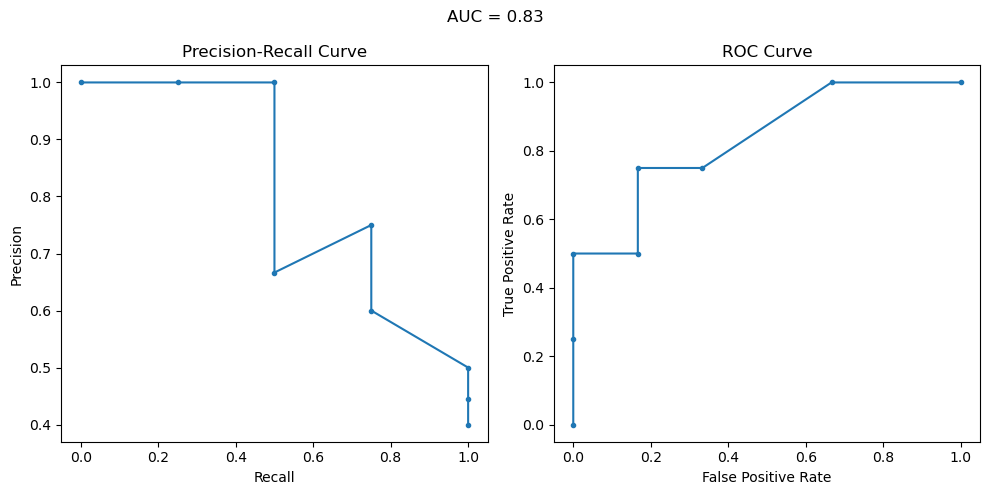

In [1]:
#第一题
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# 给定数据
Y_true = np.array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0])
Y_score = np.array([0.90, 0.40, 0.20, 0.60, 0.50,
                   0.40, 0.70, 0.40, 0.65, 0.35])

# 计算PR曲线
precision, recall, _ = precision_recall_curve(Y_true, Y_score)

# 计算ROC曲线
fpr, tpr, _ = roc_curve(Y_true, Y_score)

# 计算AUC值
auc_score = auc(fpr, tpr)

# 绘制PR曲线
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# 绘制ROC曲线
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# 显示AUC值
plt.suptitle(f'AUC = {auc_score:.2f}')
plt.tight_layout()
plt.show()

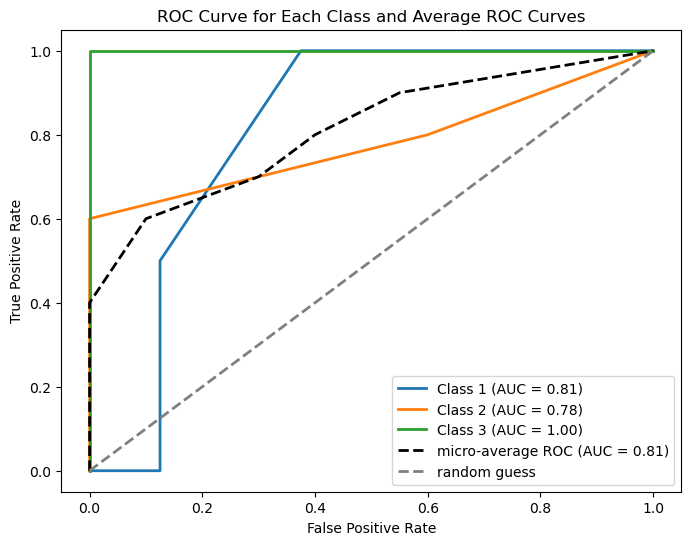

In [2]:
#第二题
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 真实标签和预测分数
true_labels = np.array([[0, 0, 1],
                        [0, 1, 0],
                        [1, 0, 0],
                        [0, 0, 1],
                        [1, 0, 0],
                        [0, 1, 0],
                        [0, 1, 0],
                        [0, 1, 0],
                        [0, 0, 1],
                        [0, 1, 0]])

predicted_scores = np.array([[0.1, 0.2, 0.7],
                             [0.1, 0.6, 0.3],
                             [0.5, 0.2, 0.3],
                             [0.1, 0.1, 0.8],
                             [0.4, 0.2, 0.4],
                             [0.6, 0.3, 0.1],
                             [0.4, 0.2, 0.4],
                             [0.4, 0.1, 0.5],
                             [0.1, 0.1, 0.8],
                             [0.1, 0.8, 0.1]])

# 分别为每个类别计算ROC曲线
plt.figure(figsize=(8, 6))
for i in range(true_labels.shape[1]):
    fpr, tpr, _ = roc_curve(true_labels[:, i], predicted_scores[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i+1} (AUC = {roc_auc:.2f})')

# 计算并绘制平均ROC曲线：micro、macro、weighted average
fpr_micro, tpr_micro, _ = roc_curve(
    true_labels.ravel(), predicted_scores.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# 计算macro平均AUC
roc_auc_macro = np.mean([auc(fpr, tpr) for fpr, tpr, _ in [roc_curve(
    true_labels[:, i], predicted_scores[:, i]) for i in range(true_labels.shape[1])]])

# 计算weighted average AUC
class_counts = np.sum(true_labels, axis=0)
roc_auc_weighted = np.average([auc(fpr, tpr) for fpr, tpr, _ in [roc_curve(
    true_labels[:, i], predicted_scores[:, i]) for i in range(true_labels.shape[1])]], weights=class_counts)

plt.plot(fpr_micro, tpr_micro, linestyle='--', lw=2, color='black',
         label=f'micro-average ROC (AUC = {roc_auc_micro:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2,
         color='gray', label='random guess')

# 添加标题和标签
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class and Average ROC Curves')
plt.legend(loc="lower right")
plt.show()